## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_data = merge_df.copy()
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
Mouse_unique = len(merge_df["Mouse ID"].unique())
Mouse_unique

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice_df = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupe_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df.head(30)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == "g989"].index, inplace = True)
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
Mouse2_unique = len(mouse_data["Mouse ID"].unique())
Mouse2_unique

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.


summary_df = mouse_data.groupby(["Drug Regimen"]).describe()
summary_df = summary_df["Tumor Volume (mm3)"]
summary2_df = summary_df.drop(columns=['count','min', '25%', '75%', 'max'])
summary2_df = summary2_df.rename(columns={"50%":"median"})

summary3_df = mouse_data.groupby(["Drug Regimen"])
summary3_df = summary3_df["Tumor Volume (mm3)"].var()

summary4_df = mouse_data.groupby(["Drug Regimen"])
summary4_df = summary4_df["Tumor Volume (mm3)"].sem()

merged_df = pd.merge(summary2_df, summary3_df, on="Drug Regimen", how="outer")                     
merged_df = merged_df.rename(columns={"Tumor Volume (mm3)":"variance"})
merged2_df = pd.merge(merged_df, summary4_df, on="Drug Regimen", how="outer")                     
merged2_df = merged2_df.rename(columns={"Tumor Volume (mm3)":"sem", "std" : "standard deviation"})
merged2_df = merged2_df.loc[:, ["mean", "median","variance", "standard deviation", "sem"]]
merged2_df.head(10)




,mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
agg_func = {'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']}

mouse_data.groupby(['Drug Regimen']).agg(agg_func)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

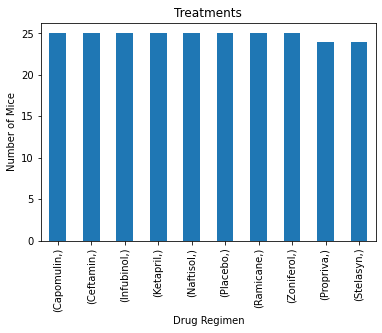

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_mice_df = mouse_data.copy()
bar_mice_df = mouse_data[["Mouse ID", "Drug Regimen"]].drop_duplicates() 
bar_mice_df[["Drug Regimen"]].value_counts()
counts = bar_mice_df[["Drug Regimen"]].value_counts()

counts.plot(kind="bar", title="Treatments")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()



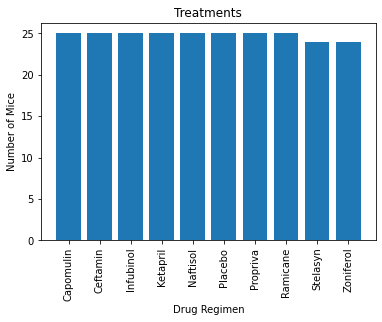

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_mice_df = mouse_data.copy()
bar_mice_df = mouse_data[["Mouse ID", "Drug Regimen"]].drop_duplicates() 
counts = bar_mice_df[["Drug Regimen"]].value_counts()

x_axis = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol" ,"Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drugs = counts

plt.bar(x_axis, drugs, align="center")

plt.title("Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='None'>

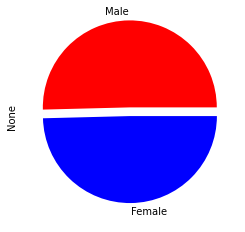

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_data[["Mouse ID", "Sex"]].drop_duplicates() 
gender_counts_df = gender_df[["Sex"]].value_counts()
labels = ["Male", "Female"]
colors = ["red", "blue"]
explode = (0.1, 0)
gender_counts_df.plot(kind='pie', y='points',labels=labels, colors=colors, explode=explode)


([<matplotlib.patches.Wedge at 0x1393260a0c8>,
 [Text(-0.01520083372288487, 1.1999037189100337, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.008867153005016174, 0.699943836030853, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

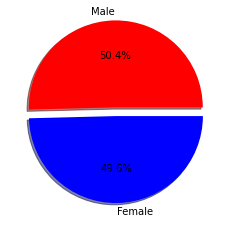

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = mouse_data[["Mouse ID", "Sex"]].drop_duplicates() 
gender_counts_df = gender_df[["Sex"]].value_counts()
gender_counts_df
labels = ["Male", "Female"]
counts = [125, 123]
colors = ["red", "blue"]
explode = (0.1, 0)
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True,)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_box = mouse_data.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])

mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Naftisol'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Zoniferol'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Ketapril'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Propriva'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Placebo'], inplace=True)
mouse_box.drop(mouse_box.index[mouse_box['Drug Regimen'] == 'Stelasyn'], inplace=True)
mouse_box




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
Cap_ls = []
for row in mouse_box.iterrows():
    #print(row[1])
    #drug=([row[1]['Drug Regimen']][0])
    #print(drug)
    if  [row[1]['Drug Regimen']][0] == 'Capomulin':
        #Cap_ls = [row[1]['Drug Regimen']== 'Capomulin'], row['Tumor Volume (mm3)']
        Cap_ls.append(row[1]['Tumor Volume (mm3)'])
        #print([row[1]['Drug Regimen']][0])
        #print(row[1]['Tumor Volume (mm3)'])
  
    #Cap_ls = [row[1]['Drug Regimen']== 'Capomulin'], row['Tumor Volume (mm3)']]
    #Cap_ls.append(Cap_ls)
print(Cap_ls)
        
# Create empty list to fill with tumor vol data (for plotting)

#mouse_box.index[mouse_box['Drug Regimen'] == 'Capomulin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = mouse_box['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# outlier_occupancy = mouse_box.loc[(mouse_box['AveOccup'] < lower_bound) | (mouse_box['AveOccup'] > upper_bound)]
# outlier_occupancy
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[40.1592203, 31.8962384, 40.65812366, 32.37735684, 38.1251644, 33.32909778, 40.72857787, 41.58152074, 31.02392294, 41.48300765, 37.07402422, 37.31184577, 36.04104736, 34.45529799, 38.98287774, 38.93963263, 38.84687569, 23.34359787, 28.43096411, 28.48403281, 47.68596303, 38.75326548, 30.48598484, 46.53920617, 39.95234669]


AttributeError: 'list' object has no attribute 'quantile'

In [130]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

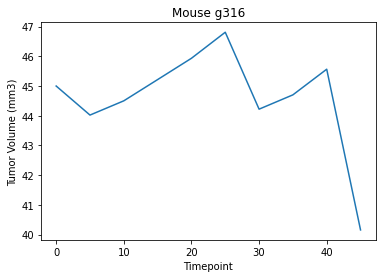

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# I chose mouse with ID = g316

mouse_line = mouse_data[mouse_data['Mouse ID'] == 'g316']
mouse_line.head(15)
x_axis = mouse_line['Timepoint']
y_axis = mouse_line['Tumor Volume (mm3)']

plt.title("Mouse g316")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.show()

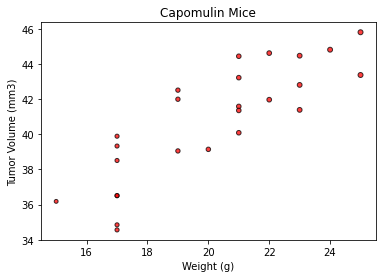

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_scatter = mouse_data[mouse_data['Drug Regimen'] == 'Capomulin']
mouse_scatter2 = mouse_scatter.groupby(['Mouse ID']).mean()

x_axis2 = mouse_scatter2['Weight (g)']
y_axis2 = mouse_scatter2['Tumor Volume (mm3)']

plt.title("Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis2, y_axis2, marker="o", facecolors="red", edgecolors="black",
           s=x_axis2, alpha=0.75)




## Correlation and Regression

The correlation coefficient between both factors is 0.84
The linear regression is: 0.7088568047708723


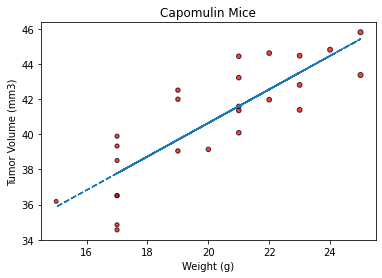

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis2, y_axis2)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
print(f"The linear regression is: {rvalue**2}")
Regline = slope * x_axis2 + intercept
plt.title("Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis2, y_axis2, marker="o", facecolors="red", edgecolors="black",
           s=x_axis2, alpha=0.75)
plt.plot(x_axis2,Regline,"--")